In [ ]:
'''
1. The data_array is cleanly divided in groups of 50 (0...49,50...99,100...149) . Take the first 40 points of
each class and create a new array called train_data (first 40 points belong to class 0, next to class 1
etc)
2. Similarly put the remaining 10 points of each class are put in another dictionary called test_data .
6. Write a function classify(train_data,test_data) that predicts the class of a point from the
test_data using the following logic.
Calculate the distance (according to this formula
(https://en.wikipedia.org/wiki/Euclidean_distance#Definition)) of a test_data point with all the
training data points.
The class predicted is the majority class of the closest (i.e. smallest distance) 30 points of the
train_data. That is, for a test_data point A, if (out of the 120 train_data points ) the closest 30 points
contains 15 of class 1 , 10 of class 0 and 5 of class 2 - then classifiy predicts the class of A to be 1
(the majority in top 30).
classify should return a 1-d array of 30 numbers (with value 0, 1 or 2).
7. Compute the accuracy of classify , by counting what percentage of predictions are correct (Remember
the correct predictions are 0 for 0-9, 1 for 10-19, 2 for 20-29). Print the accuracy.
3. Plot the train_data using the scatter() function of matplotlib . Plot only the 0,1 columns as
x and y respectively. All three classes (40 points each) should have different colours.
4. Generalize the above code to create 4C2=6 plots by choosing different columns of the data as x and y (ex
: 0,1 ; 0,2; 2,3 etc - total 6 combinations.)
5. If possible generalize the above code to use the subplots() function so that all 6 plots can be neatly
arranged.
'''

Accuracy is: 73.33333333333333


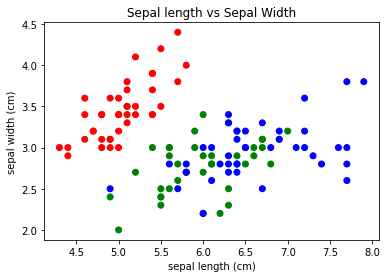

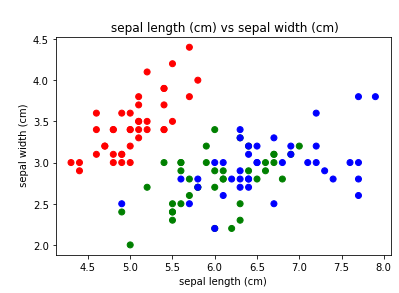

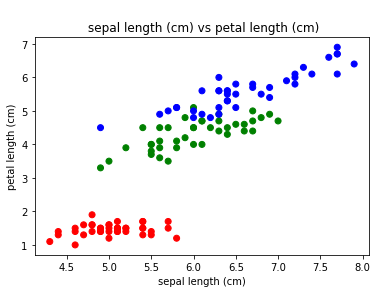

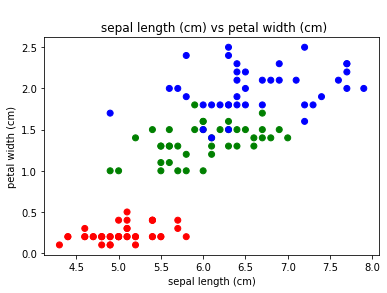

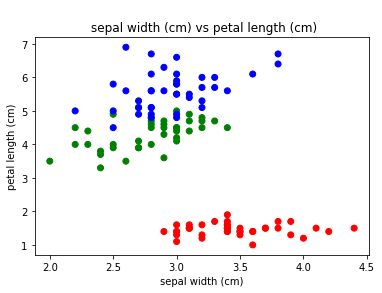

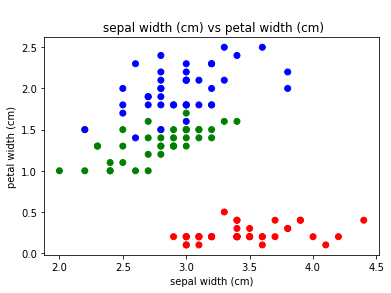

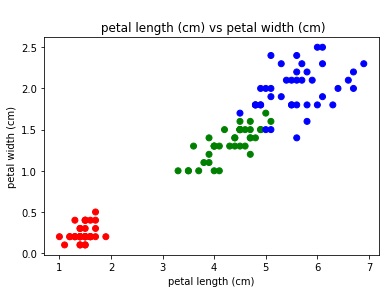

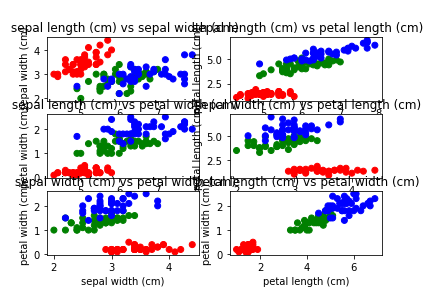

In [3]:
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt


dictionary = sklearn.datasets.load_iris()
data_array = dictionary["data"]  

# Solution for Problem 1
train_data = []
train_data.extend(data_array[0:40])
train_data.extend(data_array[50:90])
train_data.extend(data_array[100:140])

# Solution for Problem 2
test_data = []
test_data.extend(data_array[40:50])
test_data.extend(data_array[90:100])
test_data.extend(data_array[140:150])


def get_eucledian_distance(a, b):
    coordinates = tuple(zip(a, b))
    distance = 0
    for i in coordinates:
        distance = distance + ((i[0] - i[1]) ** 2)
    return distance ** (1 / 2)


def compute_majority(a):
    b = [0, 0, 0]
    for i in a:
        b[i] = b[i] + 1
    max_index = -1
    max = 0
    for index, each in enumerate(b):
        if max < each:
            max = each
            max_index = index
    return max_index


def get_train_set_categories():
    categories = []
    categories.extend([0 for each in range(40)])
    categories.extend([1 for each in range(40)])
    categories.extend([2 for each in range(40)])
    return categories


# Utility function for problem 3, 4, 5
def plot_scatter(axis, x_data, y_data, xlabel, ylabel, title):
    categories = np.array(get_train_set_categories())
    color_map = np.array(['r', 'g', 'b'])
    axis.scatter(x_data, y_data, c=color_map[categories])
    axis.set_xlabel(xlabel)
    axis.set_ylabel(ylabel)
    axis.set_title(title)


# Solution for Problem 3
train_data = np.array(train_data)
fig, axis1 = plt.subplots(1, 1)
x_data = np.reshape(train_data[:, 0], (120,))
y_data = np.reshape(train_data[:, 1], (120,))
plot_scatter(axis1, x_data, y_data, "sepal length (cm)", "sepal width (cm)", "Sepal length vs Sepal Width")

x_label_map = {0: "sepal length (cm)",
               1: "sepal length (cm)",
               2: "sepal length (cm)",
               3: "sepal width (cm)",
               4: "sepal width (cm)",
               5: "petal length (cm)"}
y_label_map = {0: "\n sepal width (cm)",
               1: "petal length (cm)",
               2: "petal width (cm)",
               3: "petal length (cm)",
               4: "petal width (cm)",
               5: "petal width (cm)"}
title_map = {0: "\n sepal length (cm) vs sepal width (cm)",
             1: "\n sepal length (cm) vs petal length (cm)",
             2: "\n sepal length (cm) vs petal width (cm)",
             3: "\n sepal width (cm) vs petal length (cm)",
             4: "\n sepal width (cm) vs petal width (cm)",
             5: "\n petal length (cm) vs petal width (cm)"}

# Solution for problem 4
train_data_features = len(train_data[0])
count = 0
for i in range(train_data_features):
    for j in range(i + 1, train_data_features):
        fig, axis = plt.subplots()
        x_data = np.reshape(train_data[:, i], (120,))
        y_data = np.reshape(train_data[:, j], (120,))
        plot_scatter(axis, x_data, y_data, x_label_map[count], y_label_map[count], title_map[count])
        count += 1

# Solution for problem 5
fig, axis = plt.subplots(3, 2)
axis_l, axis_w = 0, 0
count = 0
for i in range(train_data_features):
    for j in range(i + 1, train_data_features):
        x_data = np.reshape(train_data[:, i], (120,))
        y_data = np.reshape(train_data[:, j], (120,))
        plot_scatter(axis[axis_l][axis_w], x_data, y_data, x_label_map[count], y_label_map[count], title_map[count])
        if axis_w == (len(axis[0]) - 1):
            axis_w = 0
            axis_l += 1
        else:
            axis_w += 1
        count += 1


# Solution for problem 6
def classify(train_data, test_data):
    predicted = []
    for i in test_data:
        index_distance_dict = {}
        for index, each in enumerate(train_data):
            distance = get_eucledian_distance(i, each)
            index_distance_dict[index] = distance
        index_distance_dict = dict(sorted(index_distance_dict.items(), key=lambda item: item[1]))
        train_set_list = list(index_distance_dict.keys())
        train_set_list = train_set_list[:30]
        train_set_targets = list(dictionary["target"])
        a = []
        for i in train_set_list:
            a.append(train_set_targets[i])
        predicted.append(compute_majority(a))
    return predicted


predicted = classify(train_data, test_data)

# Solution for problem 7 for computing accuracy
total = 0
total += predicted[0:9].count(0)
total += predicted[10:19].count(1)
total += predicted[20:29].count(2) 

print(f"Accuracy is: {(total / len(test_data)) * 100}")

plt.show()